In [41]:
import warnings
warnings.filterwarnings("ignore") 
import os
import time
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 20})

In [42]:
df = pd.read_excel('result/model_results.xlsx', sheet_name='graph')
print(df)

   Dataset         Model  Score
0    wor_d           TFT     15
1    wor_d           SSF     12
2    wor_d         DNPTS      8
3    wor_d         ARIMA      6
4    wor_d  E. Smoothing      4
5    eur_d           TFT     15
6    eur_d           SSF     12
7    eur_d         DNPTS      7
8    eur_d         ARIMA      6
9    eur_d  E. Smoothing      5
10   wti_d           SSF     13
11   wti_d           TFT     14
12   wti_d         DNPTS      7
13   wti_d         ARIMA      6
14   wti_d  E. Smoothing      5


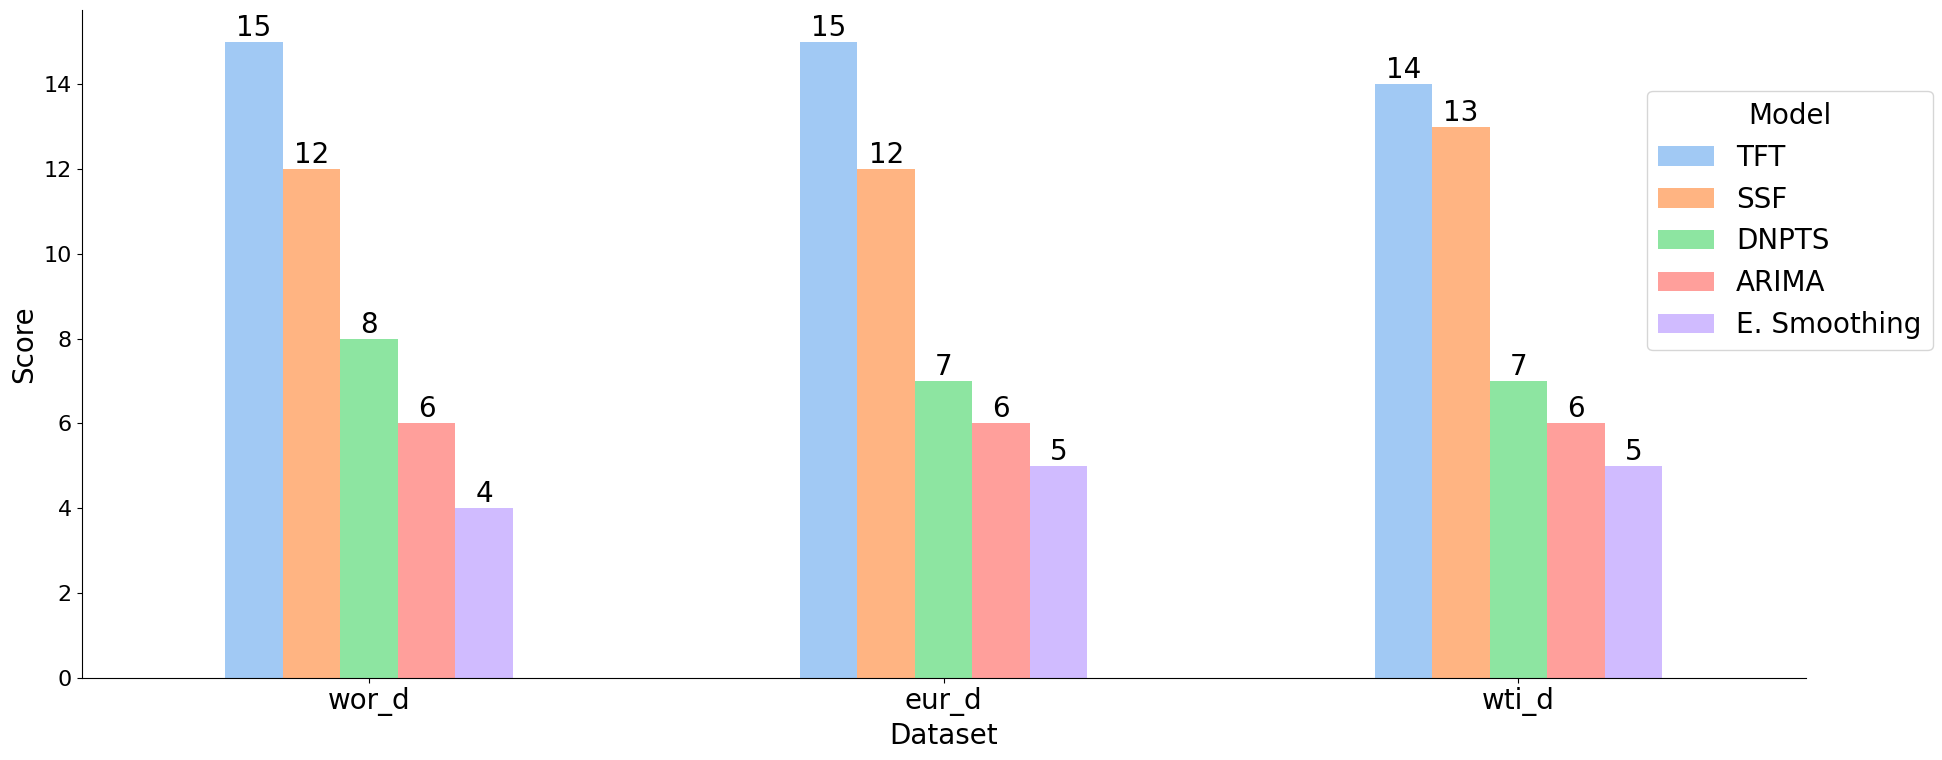

In [43]:
plt.figure(figsize=(20, 8))

# Pivotar o DataFrame
df_pivot = df.pivot(index='Dataset', columns='Model', values='Score')

# Ordenar cada dataset por ordem decrescente de Score
df_pivot = df_pivot.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Garantir a ordem dos datasets: "wor_d", "eur_d", "wti_d"
df_pivot = df_pivot.reindex(["wor_d", "eur_d", "wti_d"])

# Definir uma paleta de cores em tons pasteis
pastel_colors = sns.color_palette("pastel")

# Plotar o gráfico
ax = df_pivot.plot(kind='bar', ax=plt.gca(), color=pastel_colors)

# Ajustar os tamanhos das fontes
#plt.title('Model Performance per Dataset', fontsize=16)
plt.ylabel('Score', fontsize=20)
plt.xlabel('Dataset', fontsize=20)

# Aumentar o tamanho da fonte das legendas
plt.legend(title='Model', bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=20, title_fontsize=20)

# Aumentar o tamanho das fontes dos rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=20)

# Aumentar o tamanho das fontes dos rótulos do eixo Y
ax.tick_params(axis='y', labelsize=16)

# Adicionar valores sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=20)

# Remover as linhas da borda interna
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()

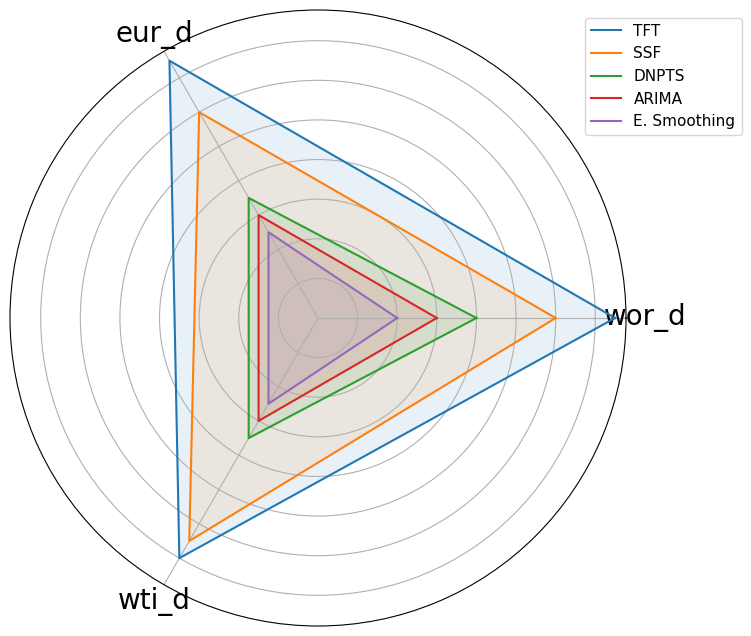

In [57]:
# 2. Gráfico de Radar
categories = list(df_pivot.index)
models = df_pivot.columns
values = df_pivot.values

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, model in enumerate(models):
    values_model = list(values[:, i])
    values_model += values_model[:1]  # Complete the loop
    ax.plot(angles, values_model, label=model)
    ax.fill(angles, values_model, alpha=0.1)

#fig.subplots_adjust(left=0.25, right=0.75, top=0.75, bottom=0.25)

ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
#plt.title('Radar Chart of Model Performance')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

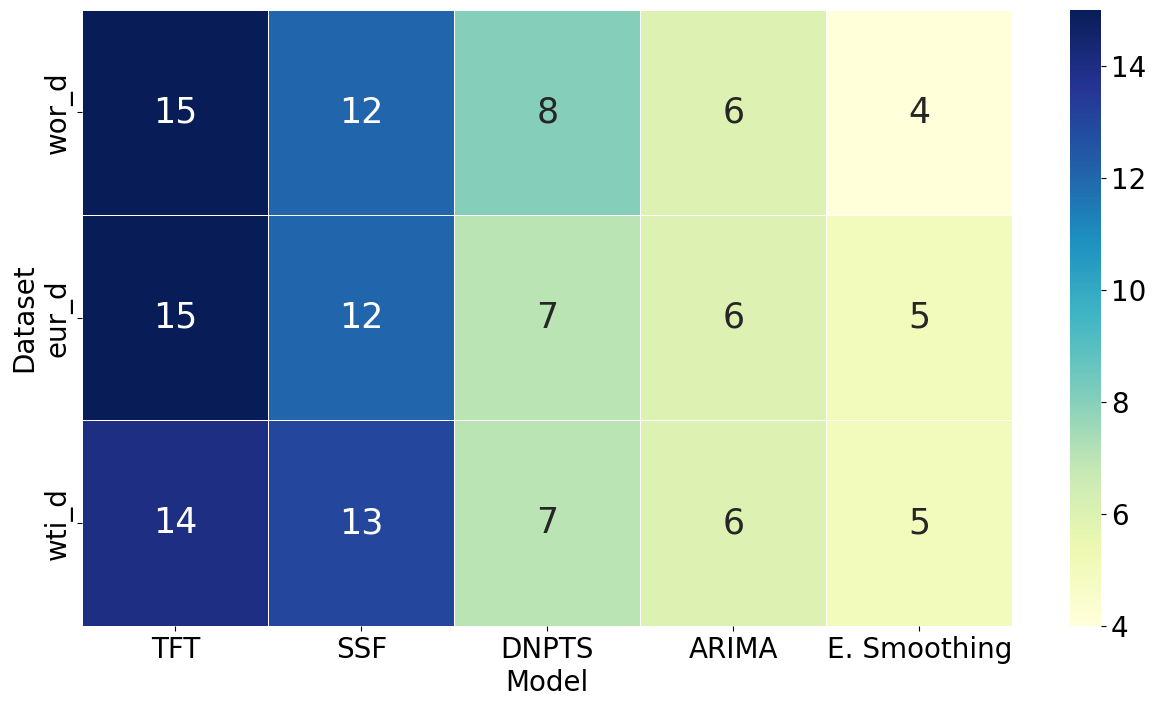

In [62]:
# Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 25})
#plt.title('Heatmap of Model Performance per Dataset')
plt.show()